# House Price Prediction

In this lab, we perform house price prediction on a housing dataset using data preprocessing, one-hot encoding, and linear regression to model the relationship between property features and sale price.

## Understanding And Cleaning Data

In [119]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('Housing.csv')

In [121]:
# Let's understand the data, how it look like.
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [122]:
# check for duplicate entries
print(df.duplicated().sum())

0


In [123]:
# check for null entries
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [124]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Some categorical columns use yes/no, which need to be converted to binary for modeling.

In [125]:
# Convert categorical columns to binary and print datatype
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


furnishingstatus has 3 values: furnished, semi-furnished, unfurnished

In [126]:
# Apply one-hot encoding to convert it into numeric columns
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [127]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


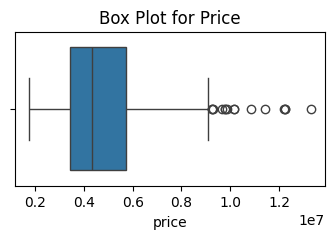

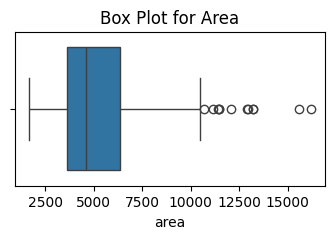

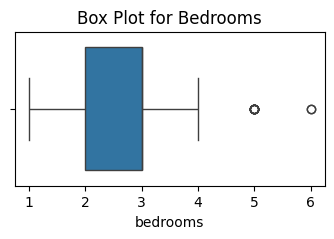

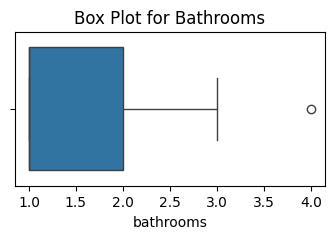

In [128]:
# Check for Outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
sns.boxplot(x='price', data=df)
plt.title('Box Plot for Price')
plt.show()
plt.figure(figsize=(4,2))
sns.boxplot(x='area', data=df)
plt.title('Box Plot for Area')
plt.show()
plt.figure(figsize=(4,2))
sns.boxplot(x='bedrooms', data=df)
plt.title('Box Plot for Bedrooms')
plt.show()
plt.figure(figsize=(4,2))
sns.boxplot(x='bathrooms', data=df)
plt.title('Box Plot for Bathrooms')
plt.show()

Extreme outliers present in area and price

Original number of rows: 545
Number of rows after removing outliers: 520


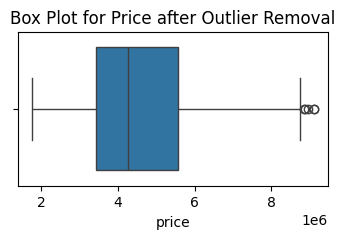

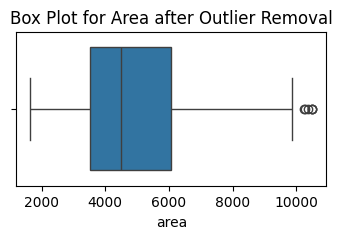

In [129]:
import matplotlib.pyplot as plt
# Outlier Removal for Price and Area based on IQR
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
df_cleaned = df[~((df['price'] < (Q1_price - 1.5 * IQR_price)) | (df['price'] > (Q3_price + 1.5 * IQR_price)) |
                  (df['area'] < (Q1_area - 1.5 * IQR_area)) | (df['area'] > (Q3_area + 1.5 * IQR_area)))]
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_cleaned)}")
# Re-check for Outliers after removal
plt.figure(figsize=(4,2))
sns.boxplot(x='price', data=df_cleaned)
plt.title('Box Plot for Price after Outlier Removal')
plt.show()
plt.figure(figsize=(4,2))
sns.boxplot(x='area', data=df_cleaned)
plt.title('Box Plot for Area after Outlier Removal')
plt.show()

## Model Building And Evaluation

In [130]:
# Define target (y) and features (X)
y = df_cleaned['price']
X = df_cleaned.drop('price', axis=1)

In [131]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 364
Testing set size: 156


Check if multicollinearity exists.

In [132]:
# Function to calculate VIF and drop features with VIF > threshold
def calculate_vif_and_drop_features(df, threshold=10.0):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    # Convert boolean columns to integers if any
    for col in df.columns:
        if df[col].dtype == bool:
            df[col] = df[col].astype(int)

    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    print("\nVIF values for features:")
    print(vif_data)

    # Identify features to drop
    features_to_drop = vif_data[vif_data['VIF'] > threshold]['feature'].tolist()
    if features_to_drop:
        print(f"\nDropping features with VIF > {threshold}: {features_to_drop}")
        df_dropped = df.drop(columns=features_to_drop)
    else:
        print(f"\nNo features with VIF > {threshold} to drop.")
        df_dropped = df.copy()

    return df_dropped

# Apply the function to X_train
X_train_after_vif = calculate_vif_and_drop_features(X_train.copy())

# Optional: Re-calculate VIF after dropping features to verify
if not X_train_after_vif.equals(X_train):
    print("\nVIF values after dropping features:")
    vif_data_after = pd.DataFrame()
    vif_data_after['feature'] = X_train_after_vif.columns
    vif_data_after['VIF'] = [variance_inflation_factor(X_train_after_vif.values, i) for i in range(X_train_after_vif.shape[1])]
    print(vif_data_after)

X_train = X_train_after_vif # Update X_train with the cleaned version


VIF values for features:
                            feature        VIF
0                              area  10.685027
1                          bedrooms  18.453188
2                         bathrooms  10.072443
3                           stories   7.640380
4                          mainroad   6.342004
5                         guestroom   1.508073
6                          basement   2.171153
7                   hotwaterheating   1.082914
8                   airconditioning   1.704975
9                           parking   1.900373
10                         prefarea   1.499178
11  furnishingstatus_semi-furnished   2.699302
12     furnishingstatus_unfurnished   2.339620

Dropping features with VIF > 10.0: ['area', 'bedrooms', 'bathrooms']

VIF values after dropping features:
                           feature       VIF
0                          stories  4.370475
1                         mainroad  4.840111
2                        guestroom  1.468928
3                         bas

scale difference can cause the model to put more weight on large-scale features like area

In [133]:
# prompt: use standered scaler

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
# Note: StandardScaler is sensitive to the feature names, ensure X_train and X_test have the same columns
# as identified after VIF
X_train_scaled_standard = scaler.fit_transform(X_train)
X_test_scaled_standard = scaler.transform(X_test_cleaned) # Use X_test_cleaned after dropping VIF columns

# Convert the scaled arrays back to DataFrames (optional, but good for readability)
X_train_scaled_standard = pd.DataFrame(X_train_scaled_standard, columns=X_train.columns, index=X_train.index)
X_test_scaled_standard = pd.DataFrame(X_test_scaled_standard, columns=X_test_cleaned.columns, index=X_test_cleaned.index)

print("\nStandard Scaled Training Data Head:")
display(X_train_scaled_standard.head())

print("\nStandard Scaled Testing Data Head:")
display(X_test_scaled_standard.head())



Standard Scaled Training Data Head:


,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
249,0.240593,0.444262,2.144761,1.317893,-0.214423,-0.675278,-0.763830,1.825742,-0.851539,-0.736460
113,-0.911721,0.444262,-0.466252,1.317893,-0.214423,-0.675278,1.664416,1.825742,-0.851539,-0.736460
487,0.240593,0.444262,-0.466252,-0.758787,-0.214423,-0.675278,-0.763830,-0.547723,-0.851539,1.357848
308,0.240593,0.444262,-0.466252,1.317893,-0.214423,-0.675278,0.450293,-0.547723,1.174344,-0.736460
38,2.545222,0.444262,2.144761,-0.758787,-0.214423,1.480872,1.664416,-0.547723,-0.851539,1.357848



Standard Scaled Testing Data Head:


,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
299,-0.911721,0.444262,-0.466252,-0.758787,-0.214423,-0.675278,2.878538,-0.547723,-0.851539,-0.736460
112,0.240593,0.444262,-0.466252,-0.758787,-0.214423,-0.675278,-0.763830,-0.547723,-0.851539,-0.736460
21,-0.911721,0.444262,2.144761,1.317893,-0.214423,1.480872,1.664416,-0.547723,-0.851539,1.357848
189,-0.911721,-2.250926,2.144761,1.317893,-0.214423,-0.675278,-0.763830,-0.547723,1.174344,-0.736460
109,0.240593,0.444262,2.144761,-0.758787,4.663690,-0.675278,0.450293,-0.547723,1.174344,-0.736460


In [134]:
#  Train a Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the scaled training data
model.fit(X_train_scaled_standard, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled_standard)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Display model coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")


Model Evaluation:
Mean Squared Error (MSE): 1397890985375.823
R-squared (R2): 0.5527704037970609

Model Coefficients:
stories: 448008.2224156461
mainroad: 227600.3045930845
guestroom: 251329.2584307808
basement: 131611.6140399035
hotwaterheating: 155217.94166931353
airconditioning: 454307.44480077614
parking: 299310.1416456917
prefarea: 272032.50743778
furnishingstatus_semi-furnished: 74547.51795106314
furnishingstatus_unfurnished: -121560.03611897209
Intercept: 4527883.076923077


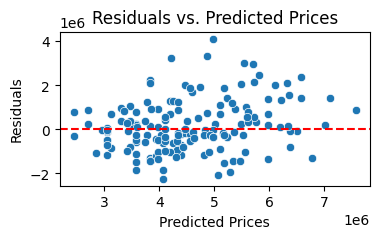

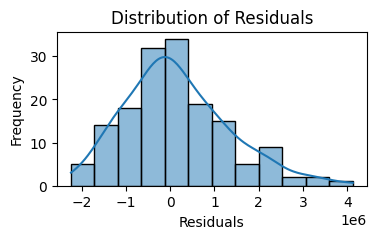

In [135]:
# Check Residuals
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.figure(figsize=(4,2))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()

plt.figure(figsize=(4,2))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()